## <font color = blue> Gradient Boost 

### <font color = blue> Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

### <font color = blue> Collect Dataset

In [2]:
xlsx = pd.ExcelFile("Gradient Boost.xlsx")
df = pd.read_excel(xlsx,"Sheet1")
df

,Cylinder Number,Car height,Engine Location,Price
0,4,48.8,1,12000
1,6,48.8,0,16500
2,5,52.4,0,15500
3,4,54.3,1,14000


### <font color = blue> Building First Model
    
The first model predictions are nothing but mean of output 

In [17]:
df['pred1'] =  df.Price.mean()
df

,Cylinder Number,Car height,Engine Location,Price,pred1,res1,pred2,res2
0,4,48.8,1,12000,14500.0,-2500.0,12000.0,0.0
1,6,48.8,0,16500,14500.0,2000.0,16500.0,0.0
2,5,52.4,0,15500,14500.0,1000.0,15500.0,0.0
3,4,54.3,1,14000,14500.0,-500.0,14000.0,0.0


### <font color = blue> Calculating Residual
 
Caculating residuals: residuals are nothing but errors made by first model in predictions. i.e actual - pred1

In [4]:
df['res1'] = df['Price'] - df['pred1']
df

,Cylinder Number,Car height,Engine Location,Price,pred1,res1
0,4,48.8,1,12000,14500.0,-2500.0
1,6,48.8,0,16500,14500.0,2000.0
2,5,52.4,0,15500,14500.0,1000.0
3,4,54.3,1,14000,14500.0,-500.0


### <font color = blue> Building First Model - Decision Tree

In [5]:
X = df.iloc[:,:3]
X

,Cylinder Number,Car height,Engine Location
0,4,48.8,1
1,6,48.8,0
2,5,52.4,0
3,4,54.3,1


In [6]:
y = df['res1']
y

0   -2500.0
1    2000.0
2    1000.0
3    -500.0
Name: res1, dtype: float64

In [7]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [8]:
tree1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

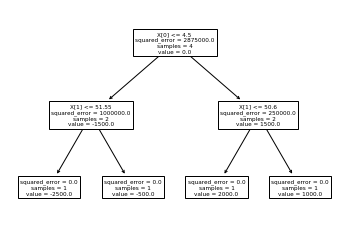

In [9]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [12]:
y_pred =  df['pred1'] + tree1.predict(X)

In [13]:
y_pred

0    12000.0
1    16500.0
2    15500.0
3    14000.0
Name: pred1, dtype: float64

In [14]:
df['pred2'] =  y_pred
df

,Cylinder Number,Car height,Engine Location,Price,pred1,res1,pred2
0,4,48.8,1,12000,14500.0,-2500.0,12000.0
1,6,48.8,0,16500,14500.0,2000.0,16500.0
2,5,52.4,0,15500,14500.0,1000.0,15500.0
3,4,54.3,1,14000,14500.0,-500.0,14000.0


In [15]:
df['res2'] = df['Price'] - df['pred2']
df

,Cylinder Number,Car height,Engine Location,Price,pred1,res1,pred2,res2
0,4,48.8,1,12000,14500.0,-2500.0,12000.0,0.0
1,6,48.8,0,16500,14500.0,2000.0,16500.0,0.0
2,5,52.4,0,15500,14500.0,1000.0,15500.0,0.0
3,4,54.3,1,14000,14500.0,-500.0,14000.0,0.0


### Stop

Since residuals are now zero, stop bulding decision tree.